In [2]:
import sys
from pathlib import Path

# allow src folder to be imported from this notebook
module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

## Examples
### `Distribution of blocks lengths`

<AxesSubplot: ylabel='Count'>

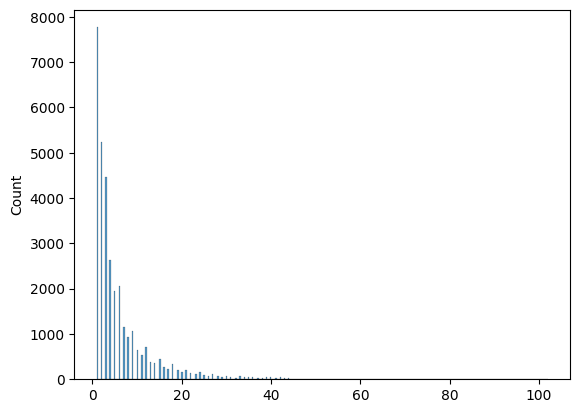

In [27]:
import json
from src.blocks import Block
import seaborn as sns

# load blocks
path_blocks = "../output-msa-difficile-nodes/block_decomposition/slpa-basis.mafft.json"
# path_blocks = "../output-didelot/block_decomposition/coli27-86.json"
with open(path_blocks,"r") as fp:
    blocks = [Block(*b) for b in json.load(fp)] 

lens_blocks = [len(b.label) for b in blocks]
sns.histplot(lens_blocks)

<AxesSubplot: ylabel='Count'>

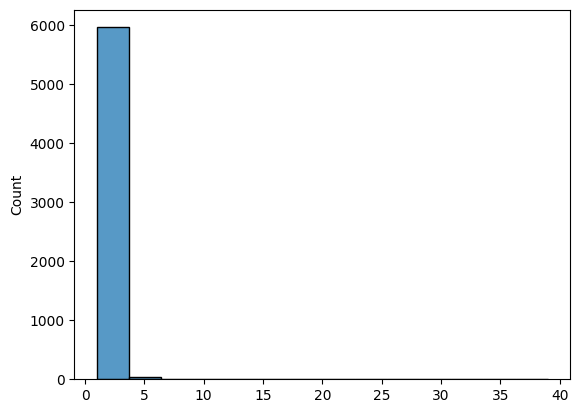

In [28]:
# blocks from optimal coverage
# load blocks
path_blocks = "../output-msa-difficile-nodes/opt-coverage/slpa-basis.mafft.json"
# path_blocks = "../output-didelot/opt-coverage/coli27-86.json"
with open(path_blocks,"r") as fp:
    blocks = [Block(*b) for b in json.load(fp)]

lens_blocks_oc = [len(b.label) for b in blocks]
sns.histplot(lens_blocks_oc)

Text(0.5, 1.0, 'Histogram length (label)')

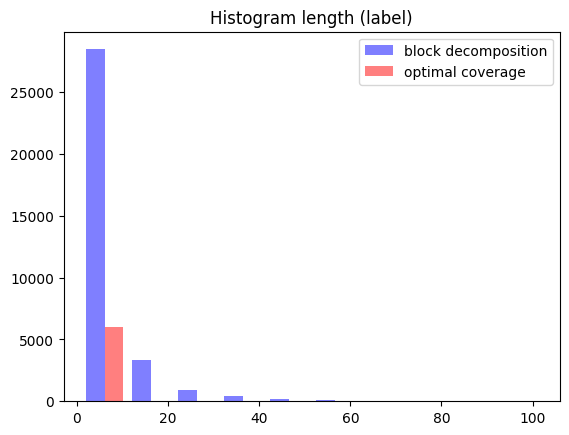

In [29]:
import matplotlib.pyplot as plt
plt.hist([lens_blocks, lens_blocks_oc], color = ["b","r"], alpha=0.5,)
plt.legend(["block decomposition","optimal coverage"])
plt.title("Histogram length (label)")


### `Block`

In [1]:
from pathlib import Path
from src.blocks import BlockAnalyzer, Block, block_decomposition, Decomposer

In [4]:
Block(K=[1,2,3],i=2,j=7,label="ACGTAC").to_positional_string()

PositionalString(b='ACGTAC', i=2, j=7)

In [2]:
path_blocks = Path("out/blocks/Cluster_10644.json")
list_blocks = BlockAnalyzer()._load_list_blocks(path_blocks)

In [3]:
list_blocks

[Block(K=(1, 2), i=0, j=75, label='CACGATTCTCCCTTTGAGTTGATGAGGTTTCAGGGAAAAGGATAGCTGATTCTCCGCTTTTGCAAGTATGAAAGGC'),
 Block(K=(0, 1, 2), i=0, j=15, label='CACGATTCTCCCTTTG'),
 Block(K=(0, 1), i=17, j=81, label='GTTGATGAGGTTTCAGGGAAAAGGATAGCTGATTCTCCGCTTTTGCAAGTATGAAAGGCGAAAAA'),
 Block(K=(0, 1, 2), i=17, j=75, label='GTTGATGAGGTTTCAGGGAAAAGGATAGCTGATTCTCCGCTTTTGCAAGTATGAAAGGC'),
 Block(K=(0, 1, 2), i=77, j=81, label='AAAAA')]

In [4]:
decomposer=Decomposer()
new_blocks = decomposer(list_blocks)

In [5]:
len(new_blocks), len(list_blocks)

(9, 5)

___
## Sub alignments

In [3]:
import random
vec = [ random.choice([True,False]) for _ in range(10)] 

In [4]:
vec

[True, True, True, True, False, True, False, False, True, True]

In [62]:
def split_vec_by_consecutive_values(vec):
    splits=[]
    curr_pos = 0
    start = 0
    end   = 0 

    while curr_pos < len(vec)-1:
        
        if vec[curr_pos] == vec[curr_pos+1]:
            end = curr_pos + 1 
        else:
            splits.append((start,end))
            start = end + 1 
            end = start

        # move one position 
        curr_pos +=1

    # append last consecutive (positions) of values
    splits.append((start, end))

    return splits

splits = split_vec_by_consecutive_values(vec)

# to access the values 
for start,end in splits:
    print(vec[start:end+1])

[True, True, True, True]
[False]
[True]
[False, False]
[True, True]


In [64]:
end-start+1

2

## Suffix tree and maximal repeats

In [2]:
import json
from Bio import AlignIO
from suffix_tree import Tree

In [3]:
filename = "../data/Cluster_4991.fa"
align = AlignIO.read(filename, "fasta")
n_cols = align.get_alignment_length()
n_seqs = len(align)
seqs = list(set([str(record.seq) for record in align]))
n_unique_seqs = len(seqs)

# def compute_max_blocks(seqs):
tree = Tree({num: enumerate(seq) for num, seq in enumerate(seqs)})
blocks = [path for (c, path) in tree.maximal_repeats()]
decoded_blocks = [
    (b[0][0],  # start positional-string 
     b[-1][0], # end positional-string
     "".join([c[1] for c in b if type(c) == tuple]) # substring positional-string
     ) for b in blocks
]
    # return decoded_blocks

In [4]:
decoded_blocks
b = blocks[0]
for c in b:
    print(c)

(0, 'C')
(1, 'C')
(2, 'T')
(3, 'T')
(4, 'T')
(5, 'A')
(6, 'A')
(7, 'T')
(8, 'T')


## Intersection of blocks
- number of blocks that intersects
- intersections between blocks

In [1]:
import json 
from pathlib import Path
from src.blocks import Block, BlockAnalyzer, Decomposer

path_blocks = Path("output/max_blocks/Cluster_7464.json")
path_blocks = Path("output-exp/max_blocks/GC00001810.json")

with open(path_blocks) as fp:
    blocks = json.load(fp)
blocks = [Block(*args) for args in blocks]


In [2]:
block_analyzer = BlockAnalyzer()
block_analyzer(blocks)

{'number_of_blocks': 38,
 'blocks_with_overlap': 38,
 'inter_between_blocks': 213}

In [4]:
block_decomposer = Decomposer()
decomposition = block_decomposer(blocks)